# **Homework 1 - ML for Time Series**

### Authors:
- Naïl Khelifa
- Tom Rossa

**Imports**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)
from statsmodels.tsa.stattools import acf # for the sample autocorrelation function 
from scipy.signal import periodogram 

**Utility functions**

In [14]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

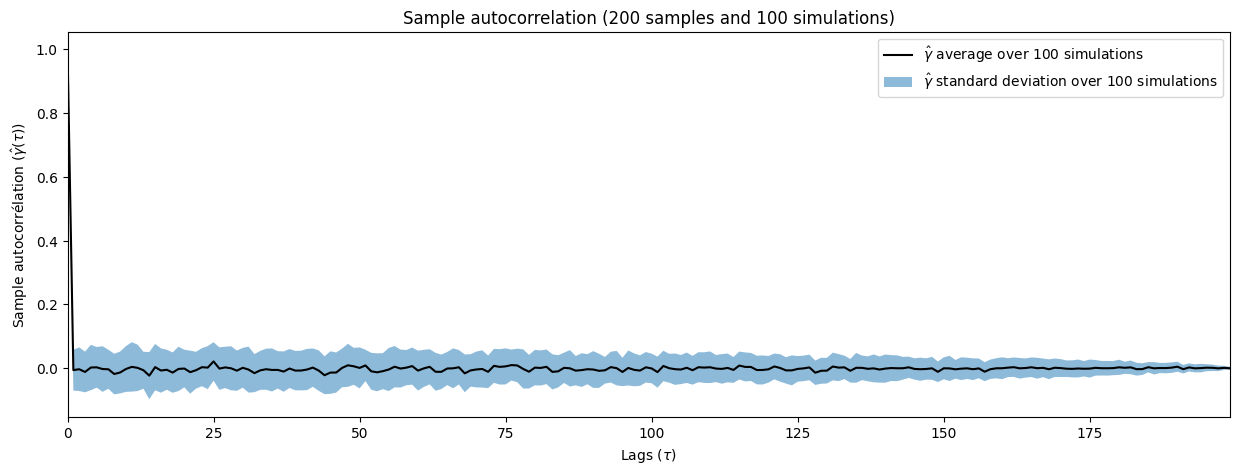

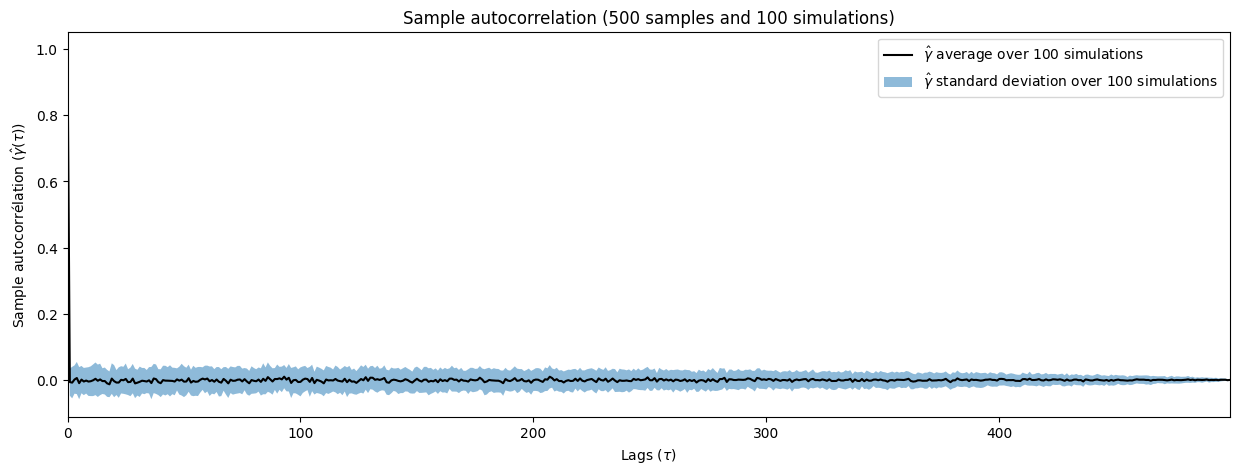

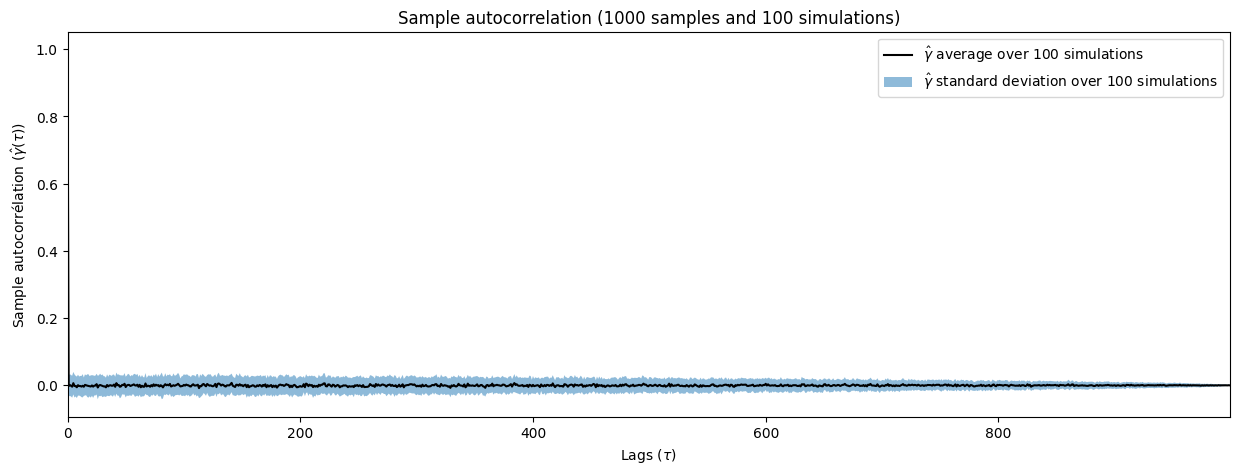

In [19]:
#  freqs = np.linspace(0, 0.5, N_samples) # since f_s = 1 Hz
N_trials = 100

for N_samples in [200, 500, 1000]:
    autocorr = []
    for _ in range(N_trials): # repeat this operation on the number of trials
        signal = np.random.randn(N_samples) # one realization of X_1, ..., X_N_samples (WGN)
        autocorr.append(acf(signal, nlags=N_samples, fft=True)) 

    autocorr = np.array(autocorr)

    y = np.arange(N_samples)
    
    fig, ax = fig_ax()
    
    avg = autocorr.mean(axis=0)
    std = autocorr.std(axis=0)
    
    ax.plot(y, avg, 'k-', label=r'$\hat{\gamma}$ average over 100 simulations')
    ax.fill_between(y, avg - std, avg + std, alpha=0.5, label=r'$\hat{\gamma}$ standard deviation over 100 simulations')
    
    # Ajouter un titre
    ax.set_title(f'Sample autocorrelation ({N_samples} samples and {100} simulations)')
    
    # Ajouter des légendes
    ax.legend()
    
    # Titres des axes
    ax.set_xlabel(r'Lags ($\tau$)')
    ax.set_ylabel(r'Sample autocorrélation ($\hat{\gamma}(\tau)$)')

    plt.show()

In [33]:
from scipy.signal import periodogram

In [34]:
#  freqs = np.linspace(0, 0.5, N_samples) # since f_s = 1 Hz
N_trials = 100
F_s = 1 # Hz 

for N_samples in [200, 500, 1000]:
    periodogram_arr = []
    sample_frequencies = []
    for _ in range(N_trials): # repeat this operation on the number of trials
        signal = np.random.randn(N_samples) # one realization of X_1, ..., X_N_samples (WGN)
        f, Pxx = periodogram(signal, fs=1)
        periodogram_arr.append(Pxx)
        sample_frequencies.append(f)

    sample_frequencies = np.array(sample_frequencies)
    periodogram_arr = np.array(periodogram_arr)

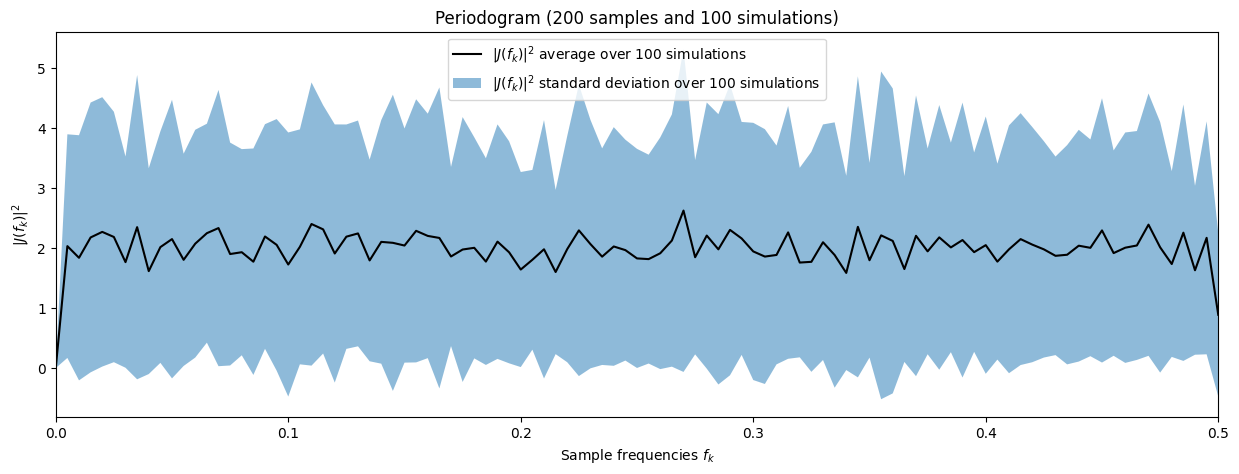

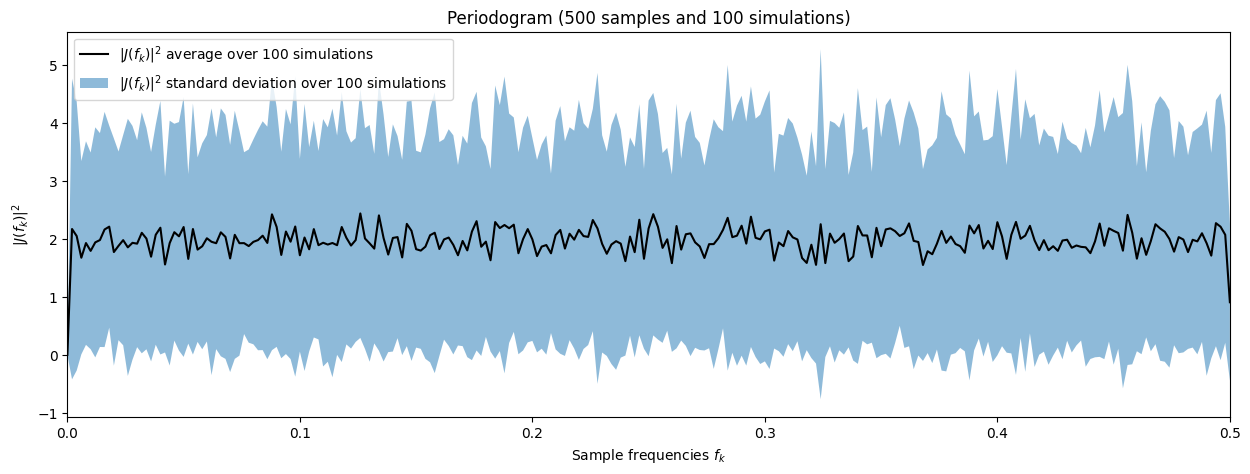

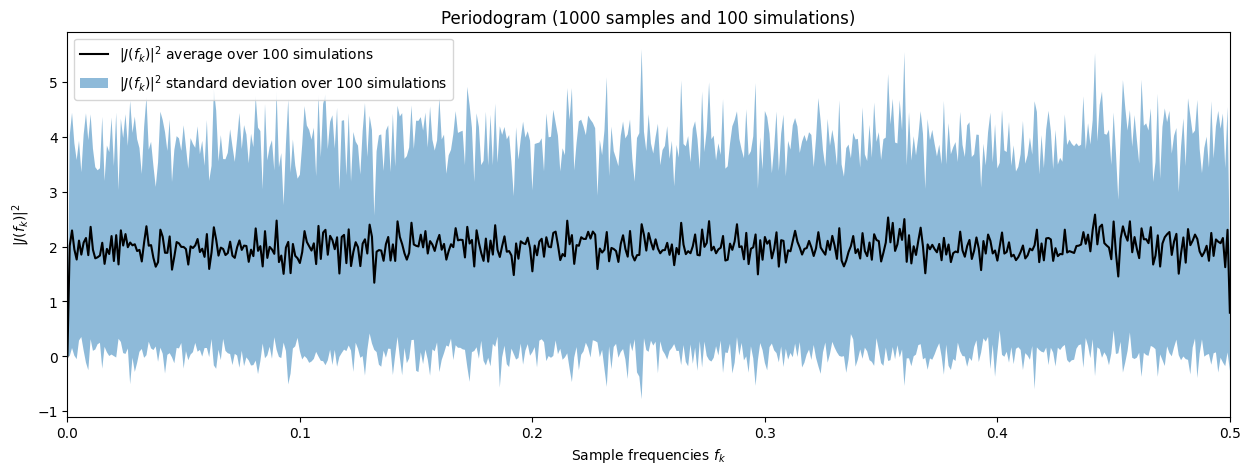

In [41]:
#  freqs = np.linspace(0, 0.5, N_samples) # since f_s = 1 Hz
N_trials = 100
F_s = 1 # Hz 

for N_samples in [200, 500, 1000]:
    periodogram_arr = []
    sample_frequencies = []
    for _ in range(N_trials): # repeat this operation on the number of trials
        signal = np.random.randn(N_samples) # one realization of X_1, ..., X_N_samples (WGN)
        f, Pxx = periodogram(signal, fs=1)
        periodogram_arr.append(Pxx)
        sample_frequencies.append(f)

    sample_frequencies = np.array(sample_frequencies)
    periodogram_arr = np.array(periodogram_arr)

    fig, ax = fig_ax()
    
    avg = periodogram_arr.mean(axis=0)
    std = periodogram_arr.std(axis=0)

    ax.plot(sample_frequencies[0], avg, 'k-', label=r'$|J(f_k)|^2$ average over 100 simulations')
    ax.fill_between(sample_frequencies[0], avg - std, avg + std, alpha=0.5, label=r'$|J(f_k)|^2$ standard deviation over 100 simulations')
    
    # Ajouter un titre
    ax.set_title(f'Periodogram ({N_samples} samples and {100} simulations)')
    
    # Ajouter des légendes
    ax.legend()
    
    # Titres des axes
    ax.set_xlabel(r'Sample frequencies $f_k$')
    ax.set_ylabel(r'$|J(f_k)|^2$')

    plt.show()

## Question 9

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [ ]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

## Question 10

## Question 11